### Notebook: using jsonstat.py to explore ISTAT data (unemployment)
This Jupyter notebook shows how to use [jsonstat.py](http://github.com/26fe/jsonstat.py) python library to explore Istat data.
[Istat](http://www.istat.it/en/about-istat) is Italian National Institute of Statistics. It publishs a rest api for querying italian statistics. 

In [1]:
from __future__ import print_function
import os
import pandas as pd
import istat

import matplotlib.pyplot as plt
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


Setting a cache dir where to store json files download by Istat api. Storing file on disk speed up development, and assures consistent results over time. Anyway you can delete file to donwload a fresh copy.

In [2]:
cache_dir = os.path.abspath(os.path.join("..", "tmp", "istat_cached"))
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
print("cache_dir is '{}'".format(cache_dir))

cache_dir is '/Users/26fe_nas/prj.python/jsonstat.py/tmp/istat_cached'


List all istat areas

In [3]:
istat.cache_dir(cache_dir)

for istat_area in istat.areas():
    print(istat_area)

CEN:2011 Population and housing census
ENT:Enterprises
ENV:Environment and Energy
POP:Population and Households
HOU:Households Economic Conditions and Disparities
HEA:Health statistics
WEL:Social Security and Welfare
EDU:Education and training
COM:Communication, culture and leisure
JUS:Justice and Security
OPI:Citizens' opinions and satisfaction with life
SOC:Social participation
ACC:National Accounts
AGR:Agriculture
IND:Industry and Construction
SER:Services
PUB:Public Administrations and Private Institutions
EXT:External Trade and Internationalisation
PRI:Prices
LAB:Labour


List all datasets contained into area `LAB` (Labour)

In [4]:
istat_area_name = 'LAB'
istat_area = istat.area(istat_area_name)

for istat_dataset in istat_area.datasets():
    print(u"{}({}):{}".format(istat_dataset.cod(), istat_dataset.nrdim(), istat_dataset.name()))

DCCV_ORELAVMED(12):Employment by number of actual weekly hours and average number of actual weekly hours
DCCV_TAXINATTMENS(8):Inactivity rate - monthly data
DCCV_TAXDISOCCU(9):Unemployment rate
DCSC_RETRCONTR1C(6):Wages according to collective labour agreements by agreement  - monthly and annual data               .
DCSC_RETRCONTR1T(6):Indicators of bargaining tension - monthly and annual data
DCCV_FORZLVDE(7):Labour force - seasonally adjusted data
DCCV_TAXDISOCCUDE(7):Unemployment rate - seasonally adjusted data
DCCV_FORZLVMENS(8):Labour force - monthly data
DCCV_INATTIV(11):Inactive population
DCSC_RETRCONTR1O(6):Annual gross, net hours, holiday pay and other hours reduction according to collective labour agreements
DCSC_OROS_1(5):Number of payroll jobs index - quarterly data
DCSC_GI_OCC(6):Employment, inflow and outflow rates in enterprises with more than 500 employees - monthly data
DCCV_DISOCCUPTDE(7):Unemployed - seasonally adjusted data
DCSC_RETRULAOROS_1(5):Gross earnings per 

List all dimension for dataset `DCCV_TAXDISOCCU` (Unemployment rate)

In [5]:
istat_dataset_name = 'DCCV_TAXDISOCCU'
istat_dataset = istat_area.dataset(istat_dataset_name)
istat_dataset.info_dimensions()

dim 0 'Territory' (1:'Italy', 3:'Nord', 4:'Nord-ovest', 5:'Piemonte', 6:'Torino', 7:'Vercelli', 8:'Biella', 9:'Verbano-Cusio-Ossola', 10:'Novara', 11:'Cuneo', 12:'Asti', 13:'Alessandria', 14:'Valle d'Aosta / Vallée d'Aoste', 15:'Valle d'Aosta / Vallée d'Aoste', 16:'Liguria', 17:'Imperia', 18:'Savona', 19:'Genova', 20:'La Spezia', 21:'Lombardia', 22:'Varese', 23:'Como', 24:'Lecco', 25:'Sondrio', 26:'Milano', 27:'Bergamo', 28:'Brescia', 29:'Pavia', 30:'Lodi', 31:'Cremona', 32:'Mantova', 33:'Nord-est', 34:'Trentino Alto Adige / Südtirol', 35:'Provincia Autonoma Bolzano / Bozen', 37:'Provincia Autonoma Trento', 39:'Veneto', 40:'Verona', 41:'Vicenza', 42:'Belluno', 43:'Treviso', 44:'Venezia', 45:'Padova', 46:'Rovigo', 47:'Friuli-Venezia Giulia', 48:'Pordenone', 49:'Udine', 50:'Gorizia', 51:'Trieste', 52:'Emilia-Romagna', 53:'Piacenza', 54:'Parma', 55:'Reggio nell'Emilia', 56:'Modena', 57:'Bologna', 58:'Ferrara', 59:'Ravenna', 60:'Forlì-Cesena', 61:'Rimini', 62:'Centro (I)', 63:'Toscana', 64

Extract data from dataset `DCCV_TAXDISOCCU` 

In [6]:
spec = { 
    "Territory": 0, # 1 Italy
    "Data type": 6, # 
    'Measure': 1,
    'Gender': 3,
    'Age class':31, # (32:'18-29 years', 
                    # 3:'20-24 years', 
                    # 4:'15-24 years', 
                    # 8:'25-34 years', 
                    # 9:'35-54 years', 
                    # 11:'35 years and over', 
                    # 14:'35-44 years', 
                    # 17:'45-54 years', 
                    # 19:'55 years and over', 
                    # 21:'55-64 years', 
                    # 22:'15-64 years', 
                    # 28:'15 years and over', 
                    # 30:'15-29 years', 
                    # 31:'15-74 years')
    'Highest level of education attained': 12,
                    #(11:'tertiary (university, doctoral and specialization courses)', 
                    # 12:'total', 
                    # 3:'primary school certificate, no educational degree', 
                    # 4:'lower secondary school certificate', 
                    # 7:'upper and post secondary')
    'Citizenship': 3, # (1:'italian', 2:'foreign', 3:'total')
    'Duration of unemployment': 3, # (2:'12 months and more', 3:'total')
    'Time and frequency': 0 # All
}

# convert istat dataset into jsonstat collection and print some info
collection = istat_dataset.getvalues(spec)
collection.info()

0: dataset 'IDITTER107*IDTIME'



Print some info of one dataset contained into the above jsonstat collection

In [7]:
jsonstat_dataset = collection.dataset(0)
jsonstat_dataset

name:   'IDITTER107*IDTIME'
label:  'Unemployment rate by Territory and Time and frequency - unemployment rate - percentage values - 15-74 years'
size: 7830
2 dimensions:
  0: dim id: 'IDITTER107' label: 'Territory' size: '135' role: 'None'
  1: dim id: 'IDTIME' label: 'Time and frequency' size: '58' role: 'None'

In [8]:
df_all = jsonstat_dataset.to_table(rtype=pd.DataFrame)
df_all.head()

,Territory,Time and frequency,Value
0,Italy,2004,8.01
1,Italy,Q1-2004,8.68
2,Italy,Q2-2004,7.88
3,Italy,Q3-2004,7.33
4,Italy,Q4-2004,8.17


In [9]:
df_all.pivot('Territory', 'Time and frequency', 'Value').head()

Time and frequency,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,Q4-2005,Q4-2006,Q4-2007,Q4-2008,Q4-2009,Q4-2010,Q4-2011,Q4-2012,Q4-2013,Q4-2014
Territory,,,,,,,,,,,,,,,,,,,,,
Abruzzo,7.71,7.88,6.57,6.17,6.63,7.97,8.67,8.59,10.85,11.29,...,6.95,6.84,5.87,6.67,7.02,9.15,9.48,10.48,11.21,12.08
Agrigento,20.18,17.62,13.40,16.91,16.72,17.43,19.42,17.61,19.48,20.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alessandria,5.34,5.37,4.65,4.63,4.85,5.81,5.34,6.66,10.48,11.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ancona,5.11,4.14,4.05,3.49,3.78,5.82,4.94,6.84,9.20,11.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arezzo,4.55,5.50,4.88,4.61,4.91,5.51,5.87,6.04,7.33,8.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
spec = { 
    "Territory": 1, # 1 Italy
    "Data type": 6, # 
    'Measure': 1,
    'Gender': 3,
    'Age class':0, # (32:'18-29 years', 
                    # 3:'20-24 years', 
                    # 4:'15-24 years', 
                    # 8:'25-34 years', 
                    # 9:'35-54 years', 
                    # 11:'35 years and over', 
                    # 14:'35-44 years', 
                    # 17:'45-54 years', 
                    # 19:'55 years and over', 
                    # 21:'55-64 years', 
                    # 22:'15-64 years', 
                    # 28:'15 years and over', 
                    # 30:'15-29 years', 
                    # 31:'15-74 years')
    'Highest level of education attained': 12,
                    #(11:'tertiary (university, doctoral and specialization courses)', 
                    # 12:'total', 
                    # 3:'primary school certificate, no educational degree', 
                    # 4:'lower secondary school certificate', 
                    # 7:'upper and post secondary')
    'Citizenship': 3, # (1:'italian', 2:'foreign', 3:'total')
    'Duration of unemployment': 3, # (2:'12 months and more', 3:'total')
    'Time and frequency': 0 # All
}

# convert istat dataset into jsonstat collection and print some info
collection_2 = istat_dataset.getvalues(spec)
collection_2.info()

0: dataset 'IDCLASETA28*IDTIME'



In [11]:
df = collection_2.dataset(0).to_table(rtype=pd.DataFrame, blocked_dims={'IDCLASETA28':'31'})
df.head(6)

,Age class,Time and frequency,Value
0,15-74 years,Q4-1992,NaN
1,15-74 years,1993,NaN
2,15-74 years,Q1-1993,NaN
3,15-74 years,Q2-1993,NaN
4,15-74 years,Q3-1993,NaN
5,15-74 years,Q4-1993,NaN


In [12]:
df = df.dropna()
df = df[df['Time and frequency'].str.contains(r'^Q.*')]
# df = df.set_index('Time and frequency')
df.head(6)

,Age class,Time and frequency,Value
57,15-74 years,Q1-2004,8.68
58,15-74 years,Q2-2004,7.88
59,15-74 years,Q3-2004,7.33
60,15-74 years,Q4-2004,8.17
62,15-74 years,Q1-2005,8.27
63,15-74 years,Q2-2005,7.54


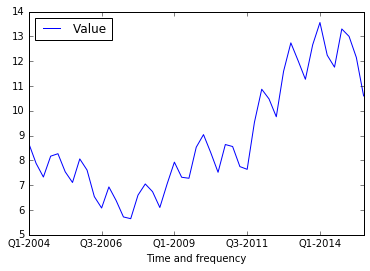

In [13]:
plt.figure(figsize=(7,4))
df.plot(x='Time and frequency',y='Value')

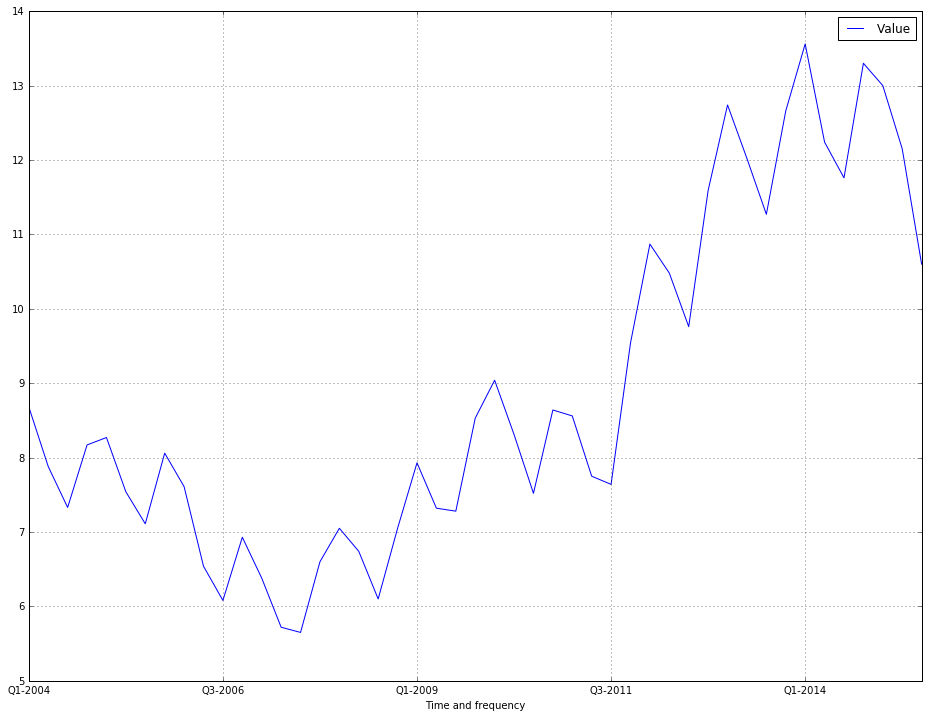

In [14]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
plt.grid(True)
df.plot(x='Time and frequency',y='Value', ax=ax, grid=True) # kind='barh', , alpha=a, legend=False, color=customcmap,
                      # edgecolor='w', xlim=(0,max(df['population'])), title=ttl)

In [15]:
# plt.figure(figsize=(7,4))
# plt.plot(df['Time and frequency'],df['Value'], lw=1.5, label='1st')
# plt.plot(y[:,1], lw=1.5, label='2st')
# plt.plot(y,'ro')
# plt.grid(True)
# plt.legend(loc=0)
# plt.axis('tight')
# plt.xlabel('index')
# plt.ylabel('value')
# plt.title('a simple plot')